In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("StudentsScore.xlsx")

In [3]:
data.head()

,StudentId,Attendance,Participation,FatherStudies,MotherStudies,OverallScore,Unnamed: 6,Unnamed: 7
0,1,90,80,diploma,diploma,A,NaN,NaN
1,2,80,80,bachelor,bachelor,A,NaN,NaN
2,3,70,85,bachelor,Master,A,NaN,NaN
3,4,60,90,diploma,doctorate,A,NaN,NaN
4,5,70,70,diploma,diploma,B,NaN,NaN


In [4]:
data['OverallScore'].value_counts()

A    180
B    102
C     92
Name: OverallScore, dtype: int64

In [5]:
data.isnull().sum()

StudentId          0
Attendance         0
Participation      0
FatherStudies      0
MotherStudies      0
OverallScore       0
Unnamed: 6       374
Unnamed: 7       374
dtype: int64

In [6]:
data['FatherStudies'].value_counts()

bachelor     144
doctorate     94
diploma       88
Master        48
Name: FatherStudies, dtype: int64

In [7]:
data['MotherStudies'].value_counts()

doctorate    114
bachelor      99
Master        89
diploma       72
Name: MotherStudies, dtype: int64

In [8]:
data["FatherStudies"][data["FatherStudies"]=="diploma"]=1
data["FatherStudies"][data["FatherStudies"]=="bachelor"]=2
data["FatherStudies"][data["FatherStudies"]=="Master"]=3
data["FatherStudies"][data["FatherStudies"]=="doctorate"]=4

In [9]:
data["MotherStudies"][data["MotherStudies"]=="diploma"]=1
data["MotherStudies"][data["MotherStudies"]=="bachelor"]=2
data["MotherStudies"][data["MotherStudies"]=="Master"]=3
data["MotherStudies"][data["MotherStudies"]=="doctorate"]=4

In [10]:
X = data[["Attendance","Participation","FatherStudies","MotherStudies"]]
y = data["OverallScore"]
y

0      A
1      A
2      A
3      A
4      B
      ..
369    B
370    C
371    B
372    B
373    A
Name: OverallScore, Length: 374, dtype: object

In [11]:
data.corr()

,StudentId,Attendance,Participation,Unnamed: 6,Unnamed: 7
StudentId,1.000000,-0.106211,-0.028927,NaN,NaN
Attendance,-0.106211,1.000000,0.360547,NaN,NaN
Participation,-0.028927,0.360547,1.000000,NaN,NaN
Unnamed: 6,NaN,NaN,NaN,NaN,NaN
Unnamed: 7,NaN,NaN,NaN,NaN,NaN


In [12]:
X = data[["Attendance","Participation","FatherStudies","MotherStudies"]]
y = data["OverallScore"]
y

0      A
1      A
2      A
3      A
4      B
      ..
369    B
370    C
371    B
372    B
373    A
Name: OverallScore, Length: 374, dtype: object

In [13]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,Attendance,Participation,FatherStudies,MotherStudies
0,0.989378,0.557187,-1.267588,-1.498069
1,0.535635,0.557187,-0.359393,-0.592935
2,0.081892,0.883813,-0.359393,0.312199
3,-0.371851,1.210440,-1.267588,1.217333
4,0.081892,-0.096067,-1.267588,-1.498069
...,...,...,...,...
369,-2.413695,-0.749320,1.456998,1.217333
370,-1.959952,-0.749320,-0.359393,-1.498069
371,-1.506209,-0.096067,-0.359393,-0.592935
372,-1.959952,-0.096067,1.456998,1.217333


<AxesSubplot:xlabel='OverallScore', ylabel='count'>

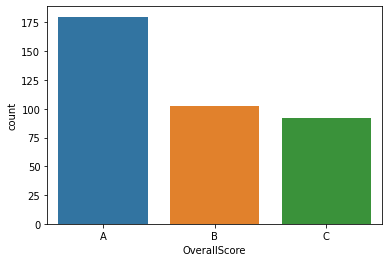

In [15]:
import seaborn as sns
sns.countplot(y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [17]:
#Setup a knn classifier with k neighbors
Model = SVC()

In [18]:
#Fit the model
Model.fit(X_train,y_train)

SVC()

In [19]:
Model.score(X_test,y_test) # Accuracy of the model

0.8407079646017699

In [20]:
Model.score(X_train,y_train) # Accuracy of the model

0.8544061302681992

In [21]:
y_pred = Model.predict(X_test)

<AxesSubplot:>

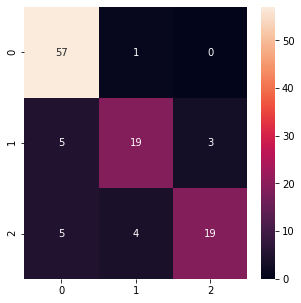

In [23]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(mat, annot=True)

In [24]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.85      0.98      0.91        58
           B       0.79      0.70      0.75        27
           C       0.86      0.68      0.76        28

    accuracy                           0.84       113
   macro avg       0.84      0.79      0.81       113
weighted avg       0.84      0.84      0.83       113



In [25]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [26]:
svc = SVC()
gs = GridSearchCV(estimator=svc,param_grid=param_grid,scoring="accuracy", cv=10)
grid_search = gs.fit(X_train,y_train)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Score:",best_score)
print("Best Parameters:",best_parameters)

Best Score: 0.8235042735042735
Best Parameters: {'C': 10, 'kernel': 'linear'}


In [27]:
Model = SVC(**best_parameters)
#Fit the model
Model.fit(X_train,y_train)
y_pred = Model.predict(X_test)

In [28]:
dt_acc = metrics.accuracy_score(y_test, y_pred)
print(dt_acc)

0.8053097345132744


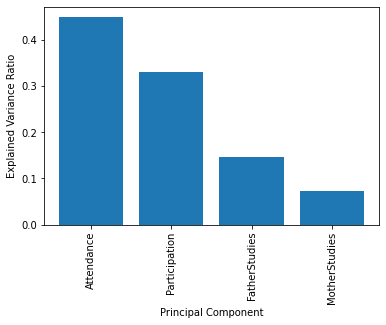

Number of components that contain more than 95% of variance: 4


In [29]:
pca = PCA()
pca.fit(X)
# Get the explained variance ratio for each component
exp_var_ratio = pca.explained_variance_ratio_

# Plot a bar chart of the explained variance ratio
feature_names = list(X_train.columns)
# Plot a bar chart of the explained variance ratio with feature names
plt.bar(range(1, len(exp_var_ratio)+1), exp_var_ratio)
plt.xticks(range(1, len(feature_names)+1), feature_names, rotation=90)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print("Number of components that contain more than 95% of variance:", n_components)

In [31]:
# Perform PCA to reduce the dimensions of the dataset
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
# Split the dataset into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [32]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [33]:
svc = SVC()
gs = GridSearchCV(estimator=svc,param_grid=param_grid,scoring="accuracy", cv=10)
grid_search = gs.fit(X_train2,y_train2)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Score:",best_score)
print("Best Parameters:",best_parameters)

Best Score: 0.8327586206896551
Best Parameters: {'C': 1000, 'kernel': 'linear'}


In [34]:
Model = SVC(**best_parameters)
#Fit the model
Model.fit(X_train2,y_train2)
y_pred2 = Model.predict(X_test2)

In [35]:
svc_acc = metrics.accuracy_score(y_test2, y_pred2)
print(svc_acc)

0.76


In [42]:
# assume row is the new data point to predict with 5 features
query_point = [[80,80,4,4]]
query_point_scaled = scaler.transform(query_point)
query_point_pca = pca.transform(query_point_scaled)
prediction = Model.predict(query_point_pca)
print("Prediction:", prediction)

Prediction: ['A']
